In [13]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [14]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/KAG_conversion_data.csv")

In [15]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [17]:
data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [18]:
data.gender.unique()

array(['M', 'F'], dtype=object)

In [19]:
data.interest.value_counts().count()

40

In [20]:
data.xyz_campaign_id.value_counts().count()

3

In [21]:
data.fb_campaign_id.value_counts().count()

691

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [23]:
data.astype({'interest': 'object'}).dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                object
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [24]:
data.age.unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [25]:
data.Total_Conversion.unique()

array([ 2,  1,  4,  3,  0,  5, 28, 13, 11, 24, 60,  7, 40, 26,  6, 20,  9,
       23, 22, 31, 10,  8, 17, 15, 16, 19, 38, 12, 14, 21, 18, 30])

In [26]:
data.set_index('ad_id',inplace=True)

In [27]:
data.columns

Index(['xyz_campaign_id', 'fb_campaign_id', 'age', 'gender', 'interest',
       'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

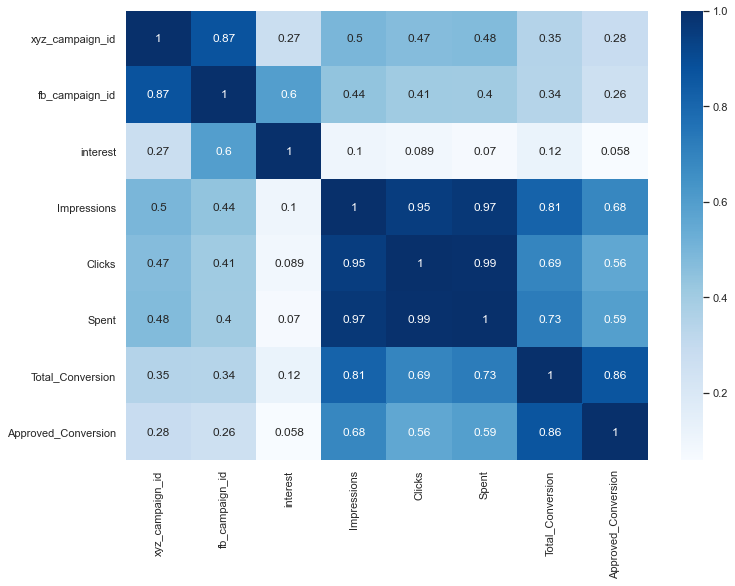

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
corr = data.corr()

# plot the heatmap



sns.heatmap(corr,annot= True,cmap='Blues', 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [29]:
data["CTR %"] = ((data["Clicks"] / data["Impressions"]) * 100)
#Cost-per-click
#   CPC = Spent / Clicks)
data["CPC"] = data["Spent"] / data["Clicks"]
#Conversion Rate - CVR %

data["CVR %"] = data["Total_Conversion"] / data["Impressions"]
data.head()

,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR %,CPC,CVR %
ad_id,,,,,,,,,,,,,
708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43,0.000272
708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.91,0.000112
708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,0.001443
708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,1.25,0.000235
708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,1.29,0.000242


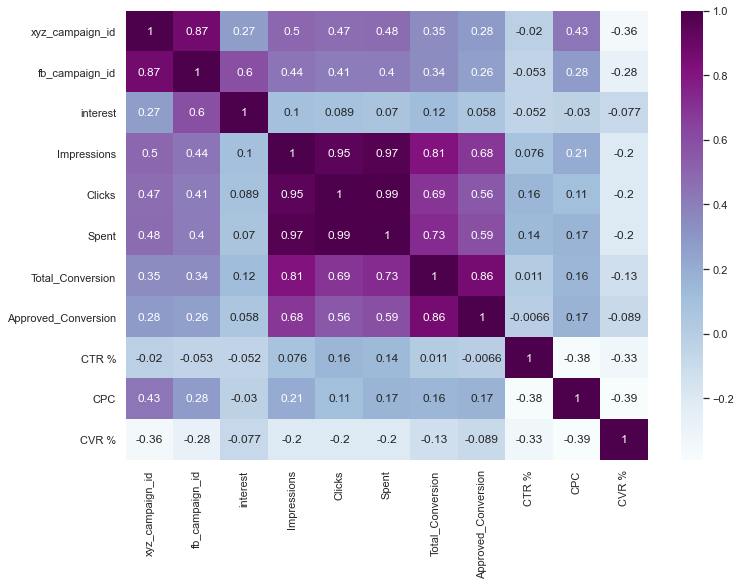

In [30]:
corr = data.corr()

# plot the heatmap

sns.heatmap(corr,annot= True,cmap='BuPu', 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [31]:
data.describe()

,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR %,CPC,CVR %
count,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,936.000000,1143.000000
mean,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007,0.016420,1.499347,0.000253
std,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708,0.011506,0.232879,0.000712
min,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.180000,0.000000
25%,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000,0.010022,1.390000,0.000012
50%,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000,0.015981,1.498273,0.000031
75%,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000,0.023364,1.644364,0.000169
max,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000,0.105932,2.212000,0.011494


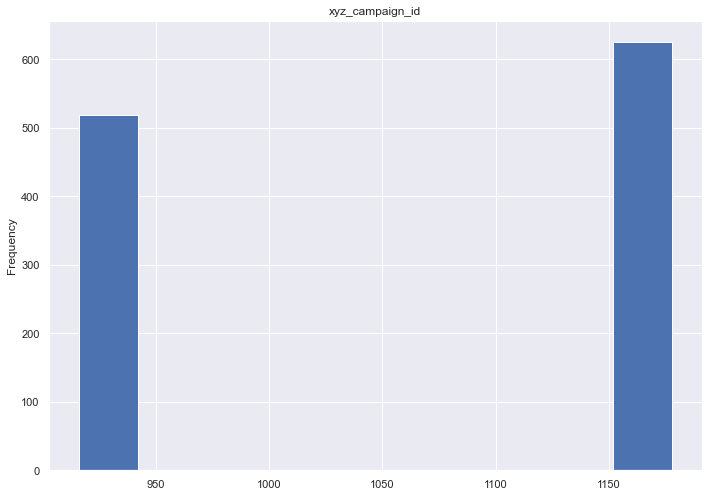

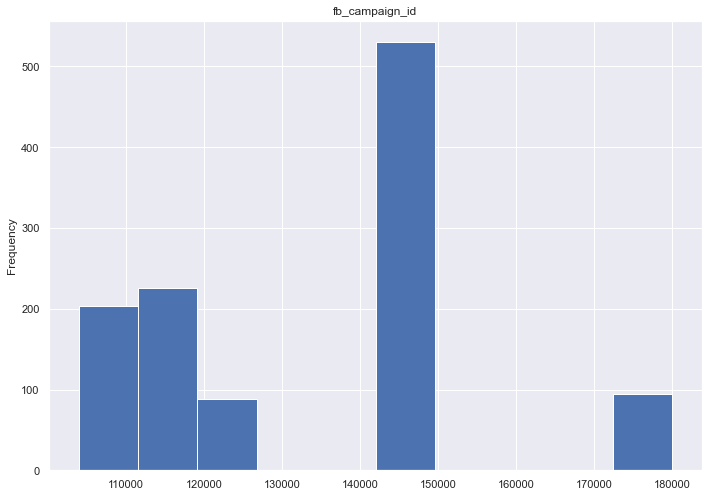

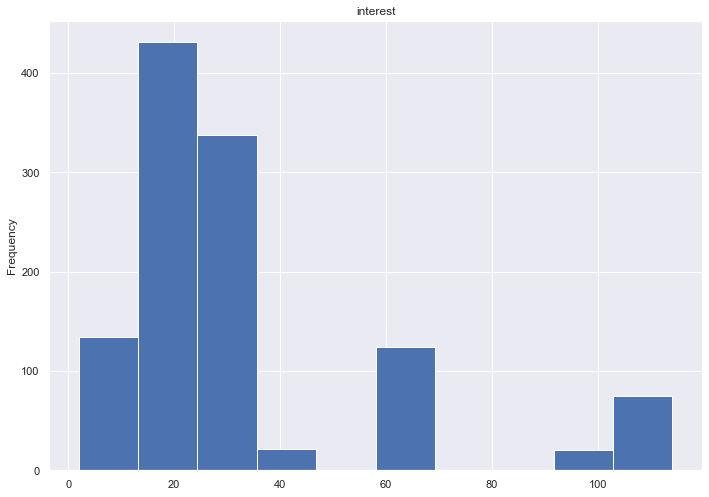

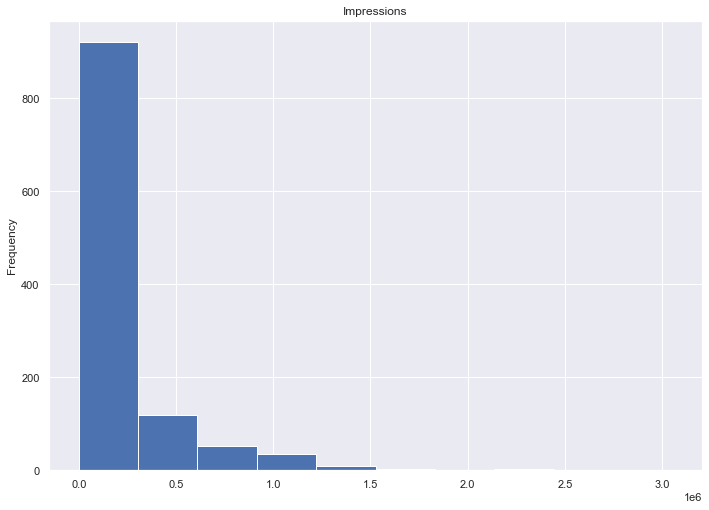

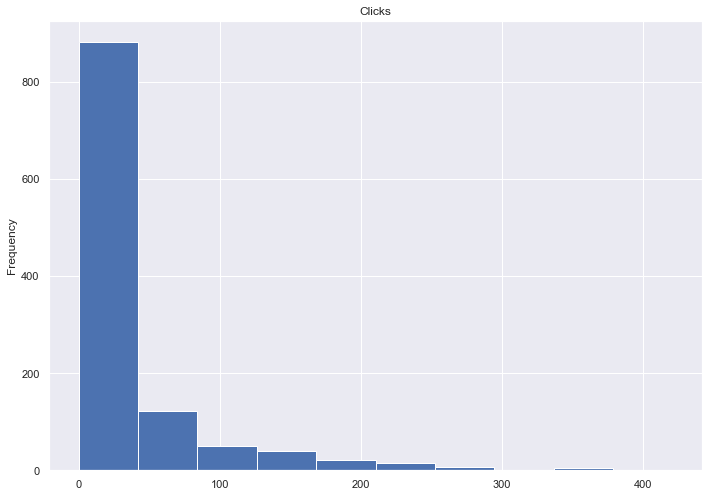

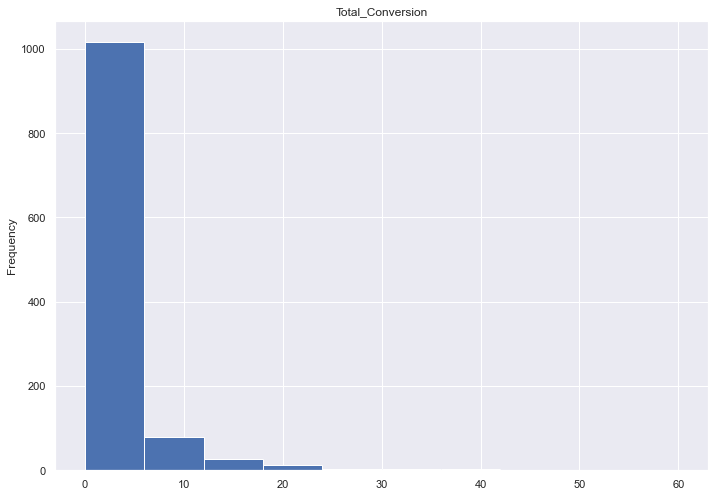

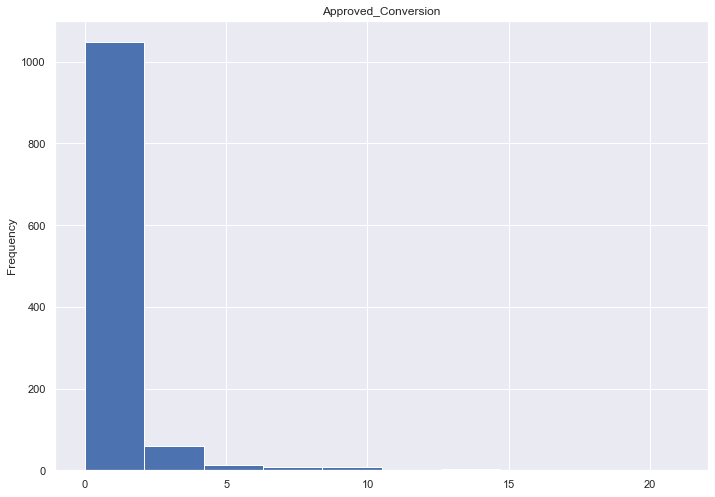

In [32]:

def hist_function(df, column):
    return df[column].plot.hist()
#import libraries

import matplotlib.pyplot as plt
# loop through columns and visualize histograms per columns
my_list = []
for col in data.columns:
    if data[col].dtypes == int:
        my_list.append(hist_function(data, col))
        plt.title(col)
        plt.show()

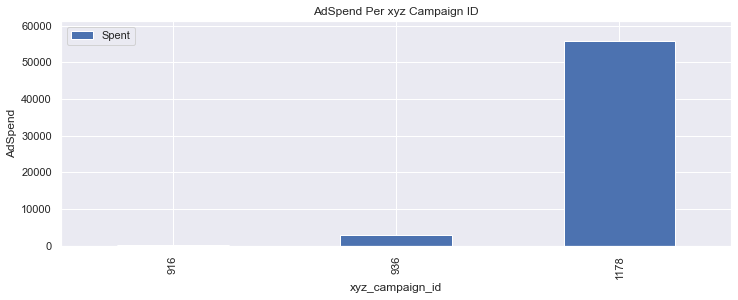

In [33]:
AdSpend = data.groupby(['xyz_campaign_id']).agg({'Spent':'sum'})
AdSpend.plot.bar(y='Spent', figsize=(12, 4))
plt.ylabel('AdSpend')
plt.title('AdSpend Per xyz Campaign ID')
plt.margins(0.1)
plt.subplots_adjust(bottom = 0.10)
plt.show()

In [34]:
"""the majority of the money is spent on the  #1178 campaign ID"""

'the majority of the money is spent on the  #1178 campaign ID'

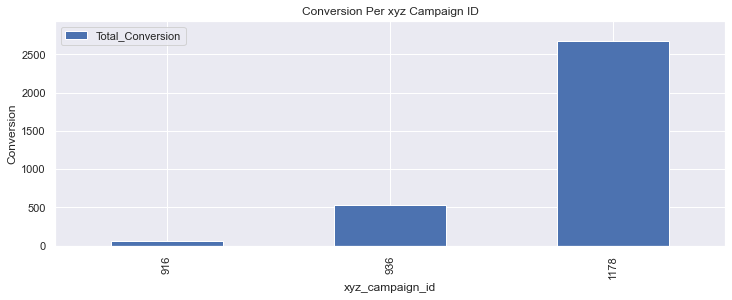

In [35]:
AdSpend = data.groupby(['xyz_campaign_id']).agg({'Total_Conversion':'sum'})
AdSpend.plot.bar(y='Total_Conversion', figsize=(12, 4))
plt.ylabel('Conversion')
plt.title('Conversion Per xyz Campaign ID')
plt.margins(0.1)
plt.subplots_adjust(bottom = 0.10)
plt.show()

In [36]:
"""the #1178 campaign ID had the majority of the conversions """

'the #1178 campaign ID had the majority of the conversions '

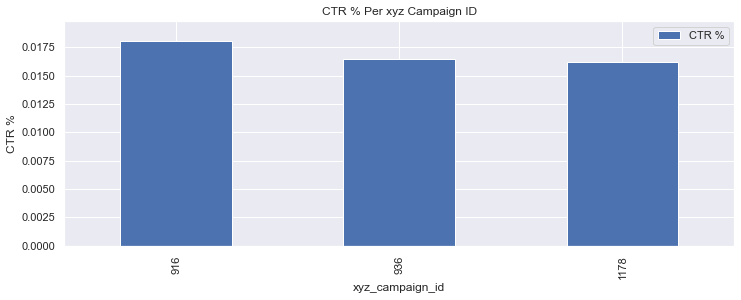

In [37]:
AdSpend = data.groupby(['xyz_campaign_id']).agg({'CTR %':'mean'})
AdSpend.plot.bar(y='CTR %', figsize=(12, 4))
plt.ylabel('CTR %')
plt.title('CTR % Per xyz Campaign ID')
plt.margins(0.1)
plt.subplots_adjust(bottom = 0.10)
plt.show()

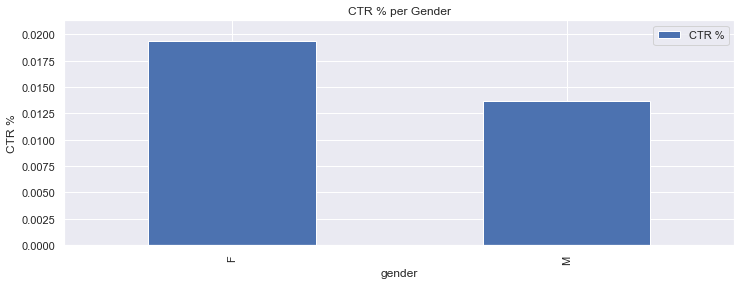

In [38]:
AdSpend = data.groupby(['gender']).agg({'CTR %':'mean'})
AdSpend.plot.bar(y='CTR %', figsize=(12, 4))
plt.ylabel('CTR %')
plt.title('CTR % per Gender')
plt.margins(0.1)
plt.subplots_adjust(bottom = 0.10)
plt.show()

In [39]:
"""Females had a higher CTR, but the difference is not significant to conclude anything at this stage"""

'Females had a higher CTR, but the difference is not significant to conclude anything at this stage'

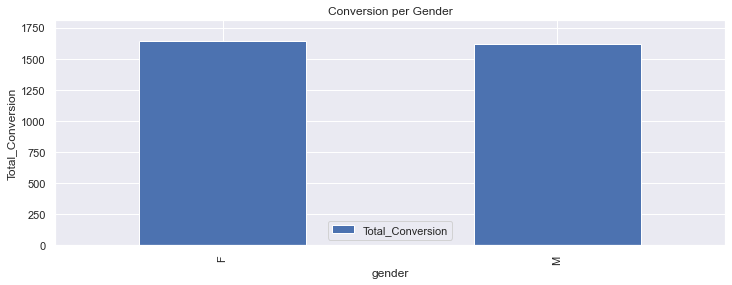

In [40]:
AdSpend = data.groupby(['gender']).agg({'Total_Conversion':'sum'})
AdSpend.plot.bar(y='Total_Conversion', figsize=(12, 4))
plt.ylabel('Total_Conversion')
plt.title('Conversion per Gender')
plt.margins(0.1)
plt.subplots_adjust(bottom = 0.10)
plt.show()

In [41]:
"""the Female group has a slightly higher sum of conversions too"""

'the Female group has a slightly higher sum of conversions too'

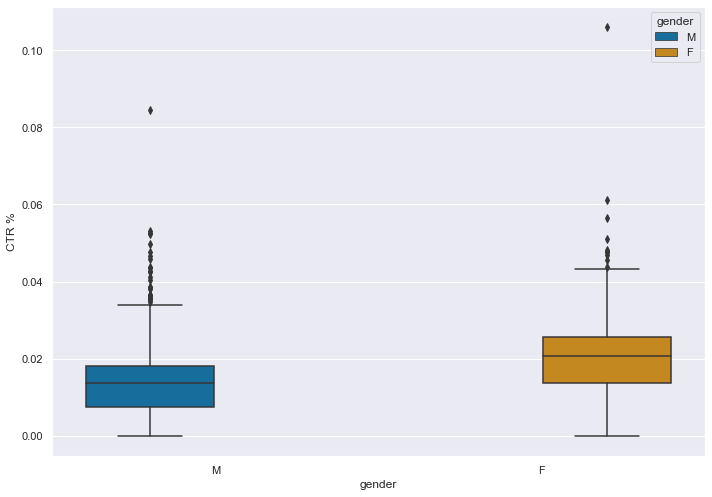

In [42]:
sns.boxplot(y='CTR %', x='gender', 
                 data=data, 
                 palette="colorblind",
                 hue='gender')

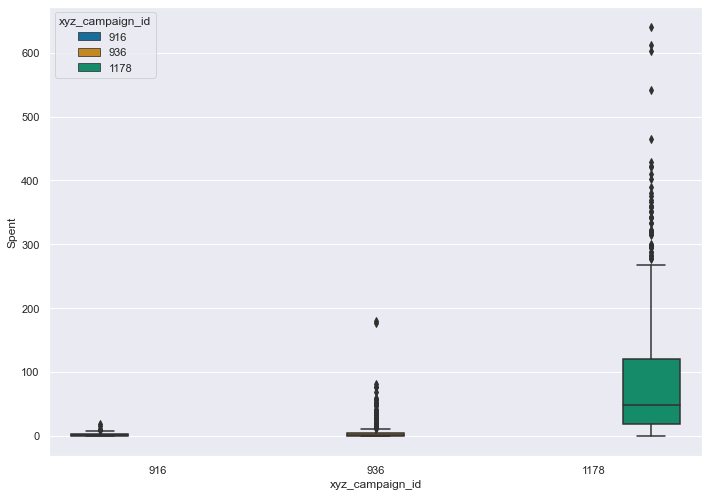

In [43]:
sns.boxplot(y='Spent', x='xyz_campaign_id', 
                 data=data, 
                 palette="colorblind",
                 hue='xyz_campaign_id')

In [44]:
"""as the majority of the money spent on the 1178 campaign, we will be focusing on this from now on, however we should check whether the Spend is efficient against other campaigns"""

'as the majority of the money spent on the 1178 campaign, we will be focusing on this from now on, however we should check whether the Spend is efficient against other campaigns'

In [45]:
filtered_data1178 =  data[data['xyz_campaign_id'] == 1178]
filtered_data916 =  data[data['xyz_campaign_id'] == 916]
filtered_data936 =  data[data['xyz_campaign_id'] == 936]
filtered_data1178.head()

,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR %,CPC,CVR %
ad_id,,,,,,,,,,,,,
1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14,0.011802,1.801773,0.000023
1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5,0.010507,1.826866,0.000020
1121094,1178,144531,30-34,M,10,24362,0,0.000000,1,1,0.000000,NaN,0.000041
1121095,1178,144531,30-34,M,10,459690,50,86.330001,5,2,0.010877,1.726600,0.000011
1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2,0.011466,1.882674,0.000015


In [46]:
filtered_data916.head()

,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR %,CPC,CVR %
ad_id,,,,,,,,,,,,,
708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43,0.000272
708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.91,0.000112
708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,0.001443
708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,1.25,0.000235
708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,1.29,0.000242


In [48]:
filtered_data1178[['Spent', 'Total_Conversion']].corr()

,Spent,Total_Conversion
Spent,1.000000,0.683936
Total_Conversion,0.683936,1.000000


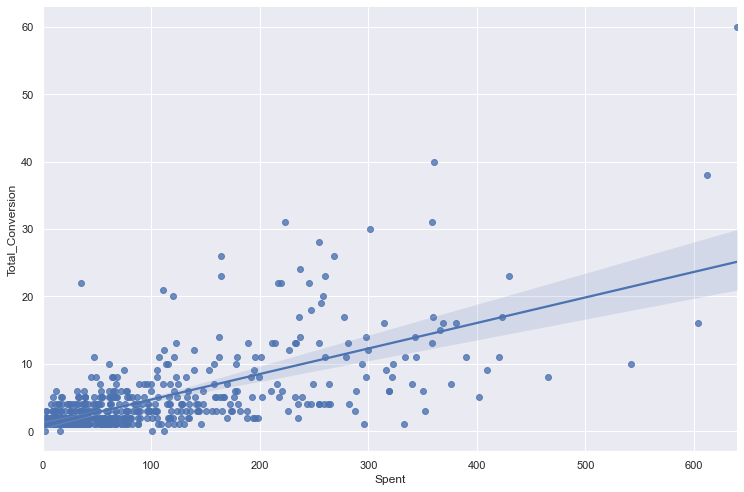

In [49]:
sns.lmplot(x="Spent", y="Total_Conversion", data=filtered_data1178, height=7, aspect=1.5)

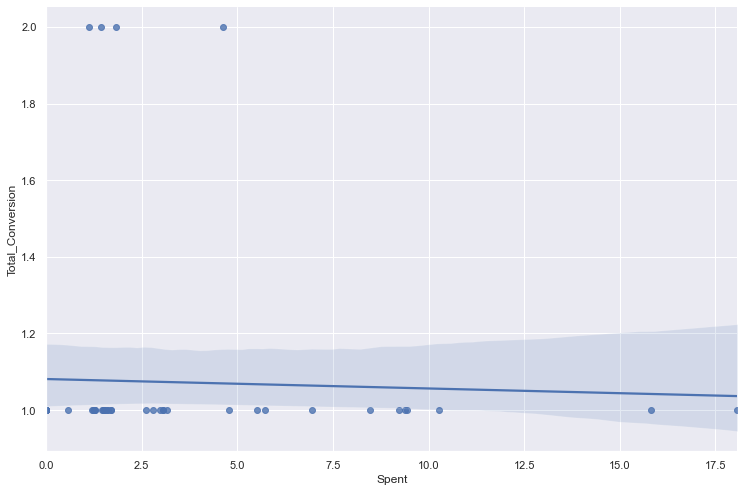

In [50]:
sns.lmplot(x="Spent", y="Total_Conversion", data=filtered_data916, height=7, aspect=1.5)

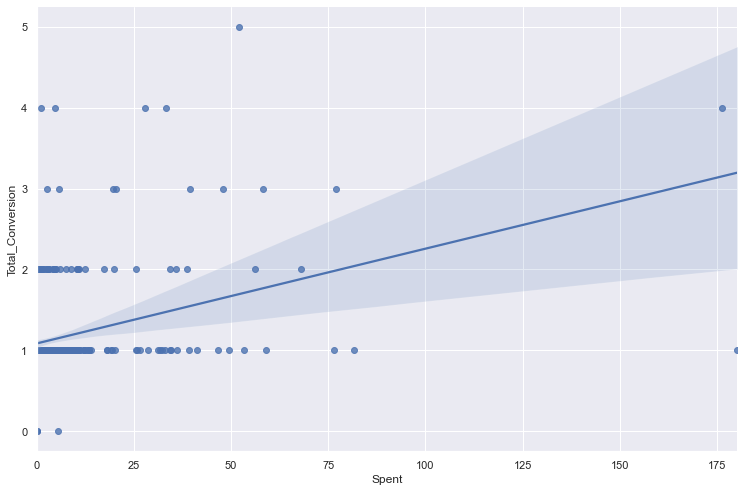

In [51]:
sns.lmplot(x="Spent", y="Total_Conversion", data=filtered_data936, height=7, aspect=1.5)

In [52]:
from scipy import stats
from scipy.stats import linregress
#campaign ID 936 

x = filtered_data936["Spent"] 
y = filtered_data936["Total_Conversion"]
#Slope of the regression line.
#Intercept of the regression line.
#rvaluefloat - Correlation coefficient.
#p-value
#Standard error of the estimated slope (gradient), under the assumption of residual normality.

s,i,r,p,st = linregress(x,y)
#936 values
stats.linregress(x,y)

LinregressResult(slope=0.011723017560287341, intercept=1.0842262342545004, rvalue=0.36382705947022176, pvalue=5.725646973676504e-16, stderr=0.00139633839236989)

In [53]:
x = filtered_data916["Spent"] 
y = filtered_data916["Total_Conversion"]
s,i,r,p,st = linregress(x,y)
#campaign ID 916 values
stats.linregress(x,y)

LinregressResult(slope=-0.0024646135991578002, intercept=1.0809069871027623, rvalue=-0.03720054455349379, pvalue=0.7894206534777862, stderr=0.009181151576291414)

In [54]:
x = filtered_data1178["Spent"] 
y = filtered_data1178["Total_Conversion"]
s,i,r,p,st = linregress(x,y)
#campaign ID 1178 values
stats.linregress(x,y)

LinregressResult(slope=0.03787941895391814, intercept=0.8968801629469496, rvalue=0.6839358407862492, pvalue=2.234168066844452e-87, stderr=0.0016188041831157233)

In [55]:
filtered_data1178.head()

,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR %,CPC,CVR %
ad_id,,,,,,,,,,,,,
1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14,0.011802,1.801773,0.000023
1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5,0.010507,1.826866,0.000020
1121094,1178,144531,30-34,M,10,24362,0,0.000000,1,1,0.000000,NaN,0.000041
1121095,1178,144531,30-34,M,10,459690,50,86.330001,5,2,0.010877,1.726600,0.000011
1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2,0.011466,1.882674,0.000015


In [56]:
filtered_data1178.head()

,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR %,CPC,CVR %
ad_id,,,,,,,,,,,,,
1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14,0.011802,1.801773,0.000023
1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5,0.010507,1.826866,0.000020
1121094,1178,144531,30-34,M,10,24362,0,0.000000,1,1,0.000000,NaN,0.000041
1121095,1178,144531,30-34,M,10,459690,50,86.330001,5,2,0.010877,1.726600,0.000011
1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2,0.011466,1.882674,0.000015


In [57]:
filtered_data1178.Total_Conversion.value_counts()

1     212
2     116
3      70
4      56
5      40
6      22
7      16
11     13
8      13
13      9
10      8
9       7
16      4
12      4
14      4
0       4
17      4
22      4
23      3
26      2
31      2
20      2
60      1
40      1
18      1
19      1
21      1
24      1
28      1
30      1
38      1
15      1
Name: Total_Conversion, dtype: int64

In [59]:
filtered_data1178.groupby(['age']).sum()['Total_Conversion']

age
30-34    1173
35-39     517
40-44     433
45-49     546
Name: Total_Conversion, dtype: int64

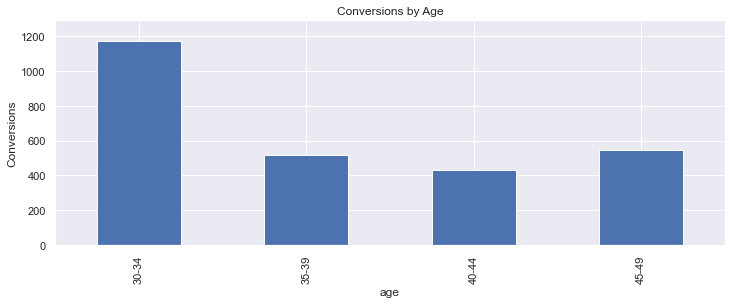

In [60]:
Conversion_per_age = filtered_data1178.groupby(['age']).sum()['Total_Conversion']
Conversion_per_age.plot.bar(y='age', figsize=(12, 4))
plt.ylabel('Conversions')
plt.title('Conversions by Age')
plt.margins(0.1)
plt.subplots_adjust(bottom = 0.10)
plt.show()

In [61]:
filtered_data1178.groupby(['gender']).sum()['Total_Conversion']

gender
F    1322
M    1347
Name: Total_Conversion, dtype: int64

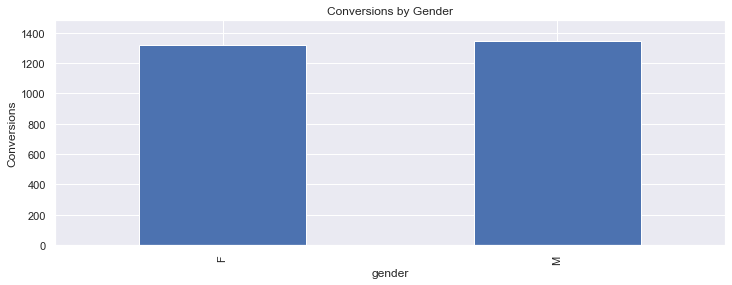

In [62]:
Conversion_per_age = filtered_data1178.groupby(['gender']).sum()['Total_Conversion']
Conversion_per_age.plot.bar(y='age', figsize=(12, 4))
plt.ylabel('Conversions')
plt.title('Conversions by Gender')
plt.margins(0.1)
plt.subplots_adjust(bottom = 0.10)
plt.show()

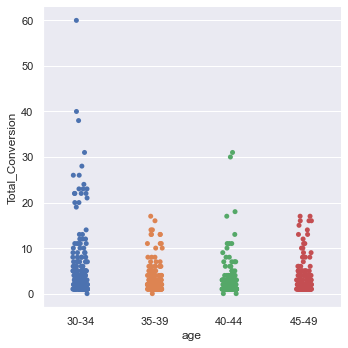

In [63]:
sns.catplot(x="age", y="Total_Conversion", hue="age",data=filtered_data1178)

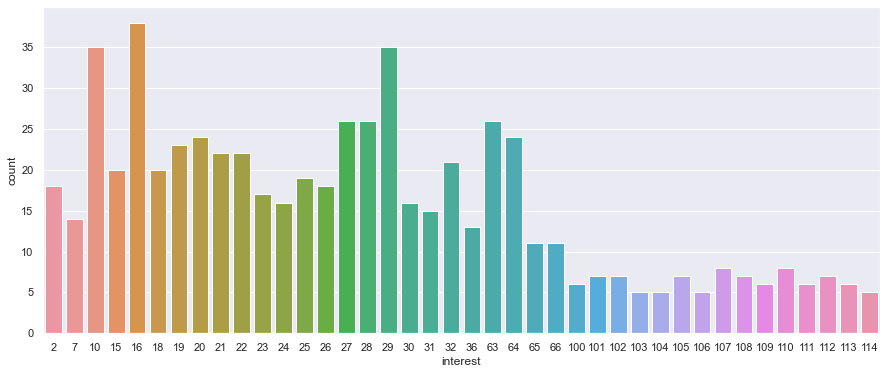

In [64]:
fig_dims = (15,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'interest',data = filtered_data1178)
plt.show()

In [69]:
Interest_categories = filtered_data1178.interest.unique().tolist()
Interest_categories

[10,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 36,
 63,
 64,
 65,
 2,
 7,
 66,
 100,
 101,
 102,
 103,
 105,
 107,
 110,
 111,
 112,
 113,
 108,
 109,
 114,
 104,
 106]

In [70]:
Interest_data = []

for interests in Interest_categories:
    Interest_data.append(filtered_data1178.loc[(filtered_data1178["interest"] == interests)]["CVR %"])
len(Interest_data)

40

In [71]:
Interest_data[0]

ad_id
1121091    0.000023
1121092    0.000020
1121094    0.000041
1121095    0.000011
1121096    0.000015
1121289    0.000010
1121290    0.000017
1121291    0.000019
1121292    0.000019
1121293    0.000009
1121439    0.000008
1121440    0.000012
1121442    0.000015
1121443    0.000009
1121444    0.000024
1121589    0.000006
1121590    0.000006
1121592    0.000009
1121593    0.000013
1121594    0.000009
1121741    0.000025
1121742    0.000038
1121889    0.000016
1121890    0.000023
1121891    0.000016
1121894    0.000005
1122039    0.000004
1122040    0.000015
1122041    0.000013
1122043    0.000008
1122044    0.000009
1122189    0.000007
1122191    0.000013
1122192    0.000009
1122193    0.000006
Name: CVR %, dtype: float64

In [72]:
Interest_data

[ad_id
 1121091    0.000023
 1121092    0.000020
 1121094    0.000041
 1121095    0.000011
 1121096    0.000015
 1121289    0.000010
 1121290    0.000017
 1121291    0.000019
 1121292    0.000019
 1121293    0.000009
 1121439    0.000008
 1121440    0.000012
 1121442    0.000015
 1121443    0.000009
 1121444    0.000024
 1121589    0.000006
 1121590    0.000006
 1121592    0.000009
 1121593    0.000013
 1121594    0.000009
 1121741    0.000025
 1121742    0.000038
 1121889    0.000016
 1121890    0.000023
 1121891    0.000016
 1121894    0.000005
 1122039    0.000004
 1122040    0.000015
 1122041    0.000013
 1122043    0.000008
 1122044    0.000009
 1122189    0.000007
 1122191    0.000013
 1122192    0.000009
 1122193    0.000006
 Name: CVR %, dtype: float64,
 ad_id
 1121097    0.000033
 1121098    0.000019
 1121100    0.000020
 1121101    0.000067
 1121102    0.000020
 1121296    0.000006
 1121297    0.000011
 1121300    0.000006
 1121446    0.000006
 1121597    0.000037
 1121598   

In [74]:
from scipy import stats

stats.f_oneway(*Interest_data)

F_onewayResult(statistic=1.9097727659183725, pvalue=0.0009416503097439706)

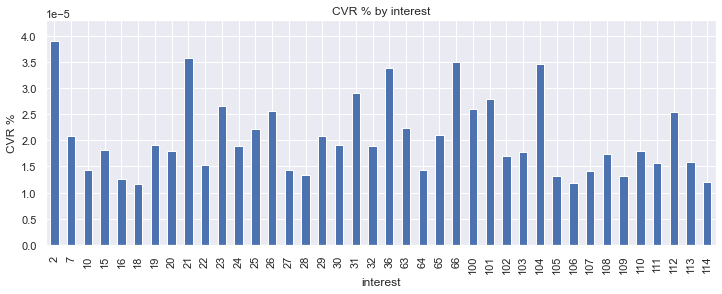

In [75]:
Conversion_per_age = filtered_data1178.groupby(['interest']).mean()['CVR %']
Conversion_per_age.plot.bar(y='interest', figsize=(12, 4))
plt.ylabel('CVR %')
plt.title('CVR % by interest')
plt.margins(0.1)
plt.subplots_adjust(bottom = 0.10)
plt.show()

In [76]:
Age_groups = filtered_data1178.age.unique().tolist()
Age_groups

['30-34', '35-39', '40-44', '45-49']

In [77]:
Age_category_data = []

for ages in Age_groups:
    Age_category_data.append(filtered_data1178.loc[(filtered_data1178["age"] == ages)]["CVR %"])

In [78]:
len(Age_category_data)

4

In [79]:
Age_category_data

[ad_id
 1121091    0.000023
 1121092    0.000020
 1121094    0.000041
 1121095    0.000011
 1121096    0.000015
              ...   
 1314364    0.000030
 1314365    0.000019
 1314366    0.000040
 1314367    0.000035
 1314368    0.000017
 Name: CVR %, Length: 201, dtype: float64,
 ad_id
 1121289    0.000010
 1121290    0.000017
 1121291    0.000019
 1121292    0.000019
 1121293    0.000009
              ...   
 1314381    0.000022
 1314382    0.000020
 1314383    0.000037
 1314384    0.000014
 1314385    0.000011
 Name: CVR %, Length: 147, dtype: float64,
 ad_id
 1121439    0.000008
 1121440    0.000012
 1121442    0.000015
 1121443    0.000009
 1121444    0.000024
              ...   
 1314395    0.000007
 1314396    0.000007
 1314397    0.000002
 1314398    0.000026
 1314400    0.000016
 Name: CVR %, Length: 129, dtype: float64,
 ad_id
 1121589    0.000006
 1121590    0.000006
 1121592    0.000009
 1121593    0.000013
 1121594    0.000009
              ...   
 1314410    0.000012
 13

In [80]:
from scipy import stats

stats.f_oneway(*Age_category_data)

F_onewayResult(statistic=15.528723775146759, pvalue=9.44738334155972e-10)

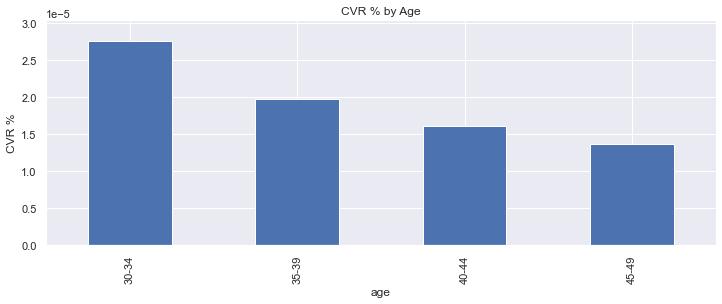

In [81]:
Conversion_per_age = filtered_data1178.groupby(['age']).mean()['CVR %']
Conversion_per_age.plot.bar(y='age', figsize=(12, 4))
plt.ylabel('CVR %')
plt.title('CVR % by Age')
plt.margins(0.1)
plt.subplots_adjust(bottom = 0.10)
plt.show()

In [82]:
Gender_groups = filtered_data1178.gender.unique().tolist()
Gender_groups

['M', 'F']

In [83]:
Male_group = filtered_data1178.loc[(filtered_data1178["gender"] == 'M')]["CVR %"]
Female_group = filtered_data1178.loc[(filtered_data1178["gender"] == 'F')]["CVR %"]
Male_group

ad_id
1121091    0.000023
1121092    0.000020
1121094    0.000041
1121095    0.000011
1121096    0.000015
             ...   
1314350    0.000014
1314351    0.000011
1314353    0.000009
1314354    0.000022
1314355    0.000007
Name: CVR %, Length: 349, dtype: float64

In [84]:
Female_group

ad_id
1121741    0.000025
1121742    0.000038
1121745    0.000011
1121746    0.000023
1121749    0.000015
             ...   
1314410    0.000012
1314411    0.000005
1314412    0.000013
1314414    0.000010
1314415    0.000010
Name: CVR %, Length: 276, dtype: float64

In [85]:
stats.ttest_ind(Male_group,Female_group)

Ttest_indResult(statistic=1.6117447883797815, pvalue=0.1075239428447942)